In [21]:
%matplotlib inline

# General libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplleaflet
plt.style.use('fivethirtyeight')

# true division for integers in 2.7
from __future__ import division

In [22]:
df = pd.read_csv('train.csv', parse_dates=[0])
df = df.drop(['Descript', 'Resolution'], axis=1)

In [23]:
print df.shape, '\n'
print df.dtypes
df.head()

(878049, 7) 

Dates         datetime64[ns]
Category              object
DayOfWeek             object
PdDistrict            object
Address               object
X                    float64
Y                    float64
dtype: object


,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541


In [24]:
# Check values for crime categories
print df.Category.describe(), '\n'
print "BREAKDOWN OF CRIME TYPE BY %:\n", 100*df.Category.value_counts()/len(df.Category)

# Issue: Top categories 100-1000x more prevalent than bottom categories 

count            878049
unique               39
top       LARCENY/THEFT
freq             174900
Name: Category, dtype: object 

BREAKDOWN OF CRIME TYPE BY %:
LARCENY/THEFT                  19.919162
OTHER OFFENSES                 14.370724
NON-CRIMINAL                   10.512397
ASSAULT                         8.755320
DRUG/NARCOTIC                   6.146696
VEHICLE THEFT                   6.125057
VANDALISM                       5.093679
WARRANTS                        4.807704
BURGLARY                        4.185985
SUSPICIOUS OCC                  3.577705
MISSING PERSON                  2.959858
ROBBERY                         2.619444
FRAUD                           1.899552
FORGERY/COUNTERFEITING          1.208247
SECONDARY CODES                 1.137180
WEAPON LAWS                     0.974319
PROSTITUTION                    0.852344
TRESPASS                        0.834350
STOLEN PROPERTY                 0.517055
SEX OFFENSES FORCIBLE           0.499744
DISORDERLY CONDUCT    

In [25]:
# Check values for addresses
print df.Address.value_counts()
df12 = df.groupby('Address').filter (lambda x: len(x) == 1)
print "\nNumber of addresses with single entry:", len(df12)

800 Block of BRYANT ST             26533
800 Block of MARKET ST              6581
2000 Block of MISSION ST            5097
1000 Block of POTRERO AV            4063
900 Block of MARKET ST              3251
0 Block of TURK ST                  3228
0 Block of 6TH ST                   2884
300 Block of ELLIS ST               2703
400 Block of ELLIS ST               2590
16TH ST / MISSION ST                2504
1000 Block of MARKET ST             2489
1100 Block of MARKET ST             2319
2000 Block of MARKET ST             2168
100 Block of OFARRELL ST            2140
700 Block of MARKET ST              2081
3200 Block of 20TH AV               2035
100 Block of 6TH ST                 1887
500 Block of JOHNFKENNEDY DR        1824
TURK ST / TAYLOR ST                 1810
200 Block of TURK ST                1800
0 Block of PHELAN AV                1791
0 Block of UNITEDNATIONS PZ         1789
0 Block of POWELL ST                1717
100 Block of EDDY ST                1681
1400 Block of PH

In [26]:
# Check values for dates
df.Dates.describe()

count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object

In [27]:
# check values for X,Y coordinates
print df.X.describe()
print '\n', df.Y.describe()

count    878049.000000
mean       -122.422616
std           0.030354
min        -122.513642
25%        -122.432952
50%        -122.416420
75%        -122.406959
max        -120.500000
Name: X, dtype: float64

count    878049.000000
mean         37.771020
std           0.456893
min          37.707879
25%          37.752427
50%          37.775421
75%          37.784369
max          90.000000
Name: Y, dtype: float64


In [28]:
# Adjust to remove out of range X,Y values

df = df[df.X < -121]
df = df[df.Y < 80]
df.shape

(877982, 7)

In [29]:
print df.X.describe()
print '\n', df.Y.describe()

count    877982.000000
mean       -122.422763
std           0.025285
min        -122.513642
25%        -122.432952
50%        -122.416420
75%        -122.406959
max        -122.364937
Name: X, dtype: float64

count    877982.000000
mean         37.767035
std           0.024165
min          37.707879
25%          37.752427
50%          37.775421
75%          37.784368
max          37.819975
Name: Y, dtype: float64


In [30]:
# check values for other categorical fields
print("Day of Week: ")
print(df.DayOfWeek.value_counts().sum())
print(df.DayOfWeek.value_counts())
print("\nDistrict: ")
print(df.PdDistrict.value_counts().sum())
print(df.PdDistrict.value_counts())



Day of Week: 
877982
Friday       133723
Wednesday    129200
Saturday     126804
Thursday     125027
Tuesday      124954
Monday       121573
Sunday       116701
Name: DayOfWeek, dtype: int64

District: 
877982
SOUTHERN      157174
MISSION       119907
NORTHERN      105284
BAYVIEW        89422
CENTRAL        85455
TENDERLOIN     81794
INGLESIDE      78841
TARAVAL        65592
PARK           49311
RICHMOND       45202
Name: PdDistrict, dtype: int64


### Look at Blocks vs Intersections

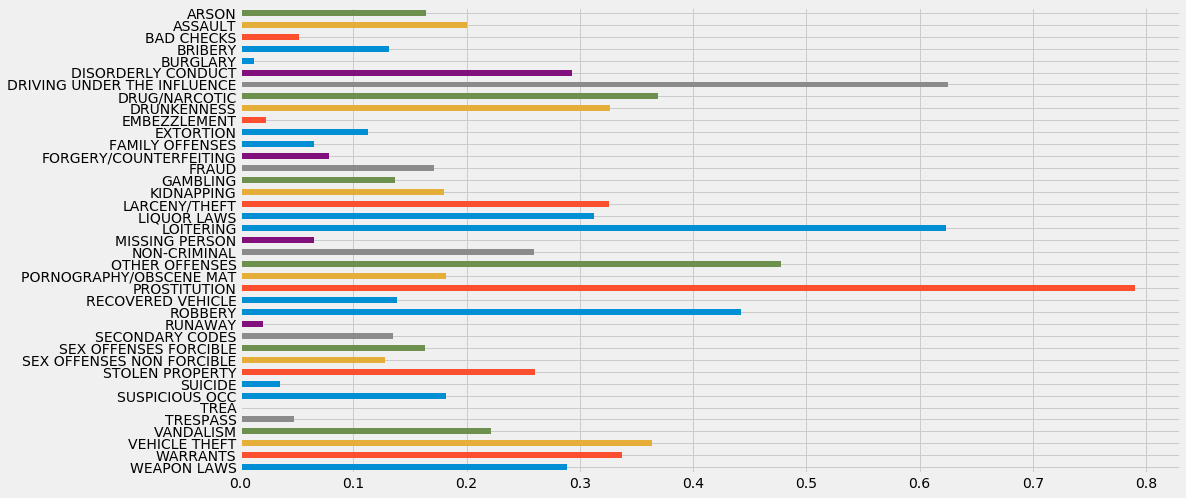

In [31]:
dfi = df[df.Address.str.contains(' / ')]

# show ratio of crime types in intersections vs whole database
dfi_ratio = dfi.Category.value_counts() / df.Category.value_counts()
dfi_ratio = dfi_ratio.sort_index(ascending = False)
dfi_ratio.plot.barh(figsize=(15,8))

### Look at crimes by minute reported 

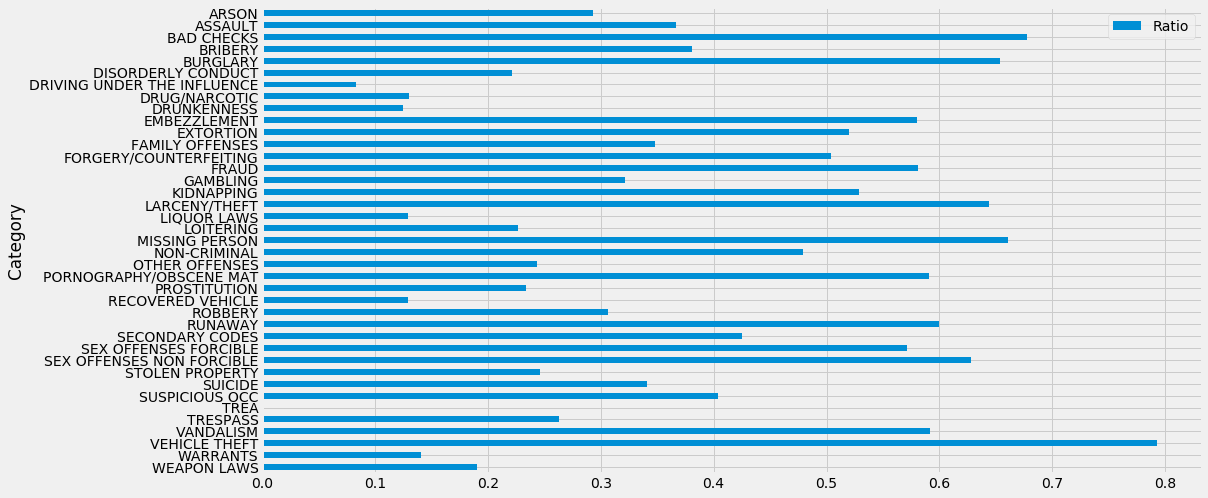

In [49]:
df['MIN'] = df.Dates.dt.minute
df['MIN_split'] = ((df.MIN == 0) | (df.MIN == 30))

minsplit = []
for cat in df.Category.unique():
    qwe = df[df.Category == cat]
    minsplit +=[[(qwe.MIN_split.sum() / qwe.MIN_split.count()), cat]]
    
minsplit = pd.DataFrame(minsplit)
minsplit.columns = ['Ratio', 'Category']
minsplit.index = minsplit.Category
minsplit = minsplit.sort_index(ascending = False)
minsplit.plot.barh(figsize=(15,8))

### Analysis of Crime by District

Text(0,0.5,'Number of Crimes')

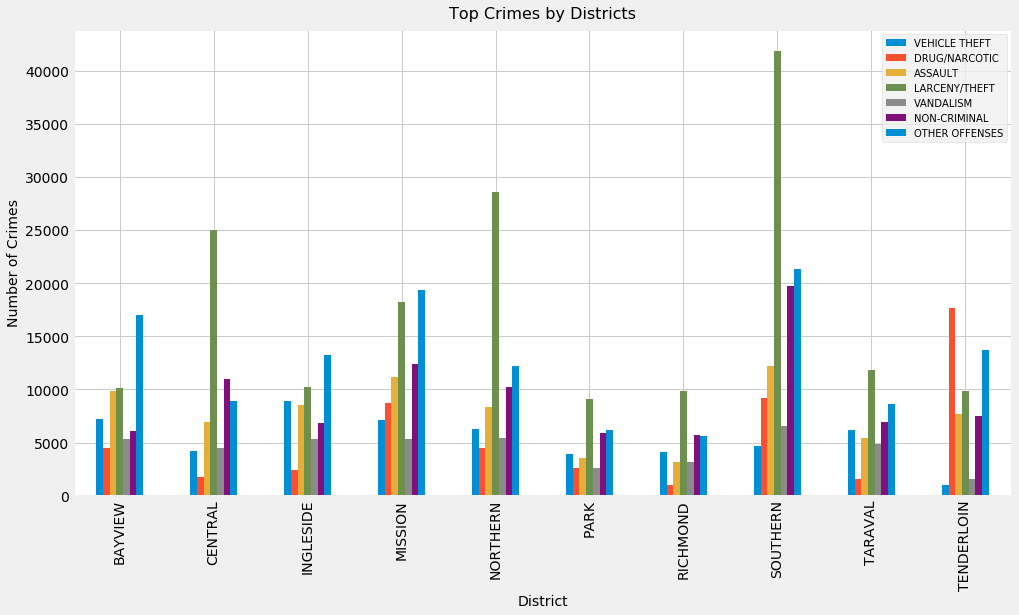

In [33]:
# Group by District and Category

grouped_dist = pd.DataFrame(df.groupby(['PdDistrict','Category']).count())
grouped_dist.reset_index(inplace=True)
#grouped_dist.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_dist_wide = grouped_dist.pivot(index='PdDistrict', columns='Category', values = 'Dates')

# crimes by district for top categories
top_5 = df.Category.value_counts().head(7)
top_5_ls = list(dict(top_5).keys())
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_dist_wide[top_5_ls].plot(ax=ax, kind='bar')
ax.set_facecolor('white')
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Top Crimes by Districts",  y=1.01, size=16)
plt.xlabel("District",size=14)
plt.ylabel("Number of Crimes", size=14)

Text(0,0.5,'Number of Crimes')

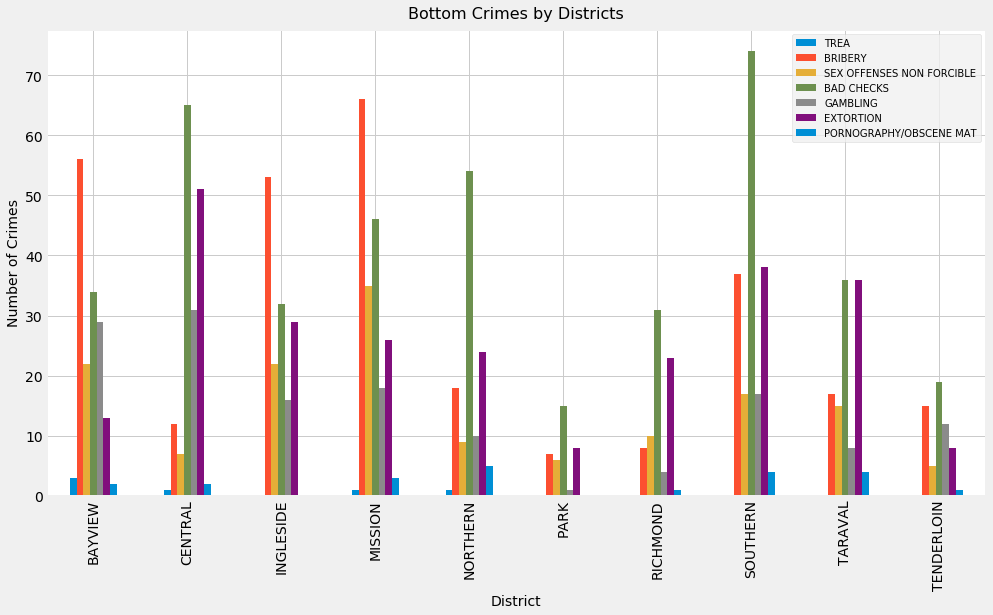

In [34]:
# crimes by district for bottom categories
top_5 = df.Category.value_counts().tail(7)
top_5_ls = list(dict(top_5).keys())
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_dist_wide[top_5_ls].plot(ax=ax, kind='bar')
ax.set_facecolor('white')
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Bottom Crimes by Districts",  y=1.01, size=16)
plt.xlabel("District",size=14)
plt.ylabel("Number of Crimes", size=14)

### Visualization of Seasonality

In [35]:
# Add Hours, Days, Months, Years 
df['DOW'] = df.Dates.dt.weekday
df['DOM'] = df.Dates.dt.day
df['HOUR'] = df.Dates.dt.hour
df['MONTH'] = df.Dates.dt.month
df['YEAR'] = df.Dates.dt.year

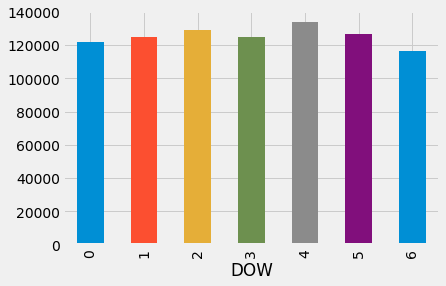

In [36]:
df.groupby(df.DOW).Dates.count().plot.bar()

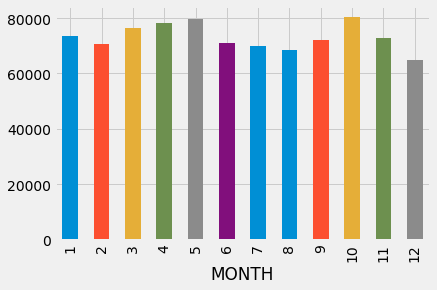

In [37]:
df.groupby(df.MONTH).Dates.count().plot.bar()

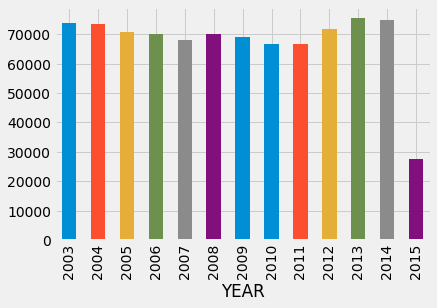

In [38]:
df.groupby(df.YEAR).Dates.count().plot.bar()

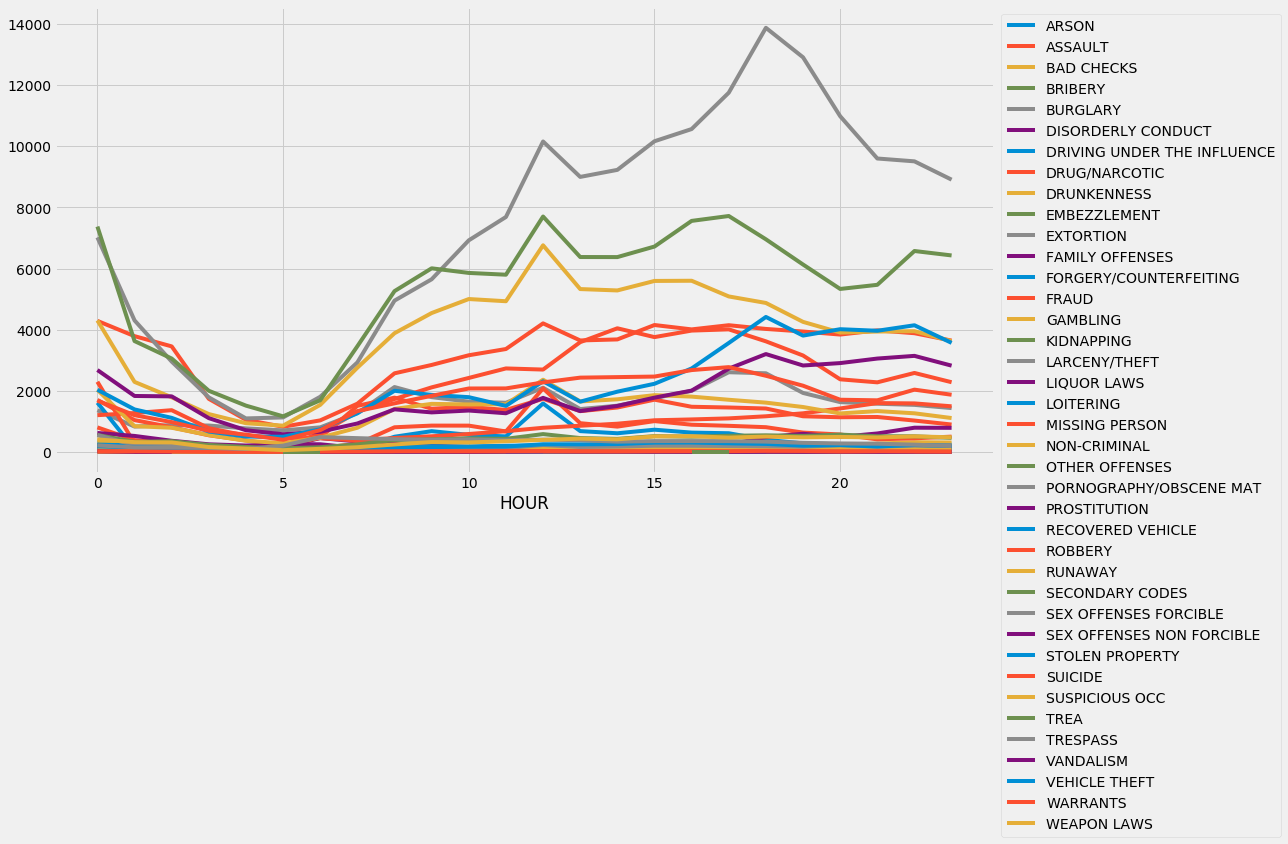

In [43]:
df.groupby([df.HOUR, 'Category']).Dates.count().unstack().plot(figsize=(15,8)).legend(bbox_to_anchor=(1, 1))

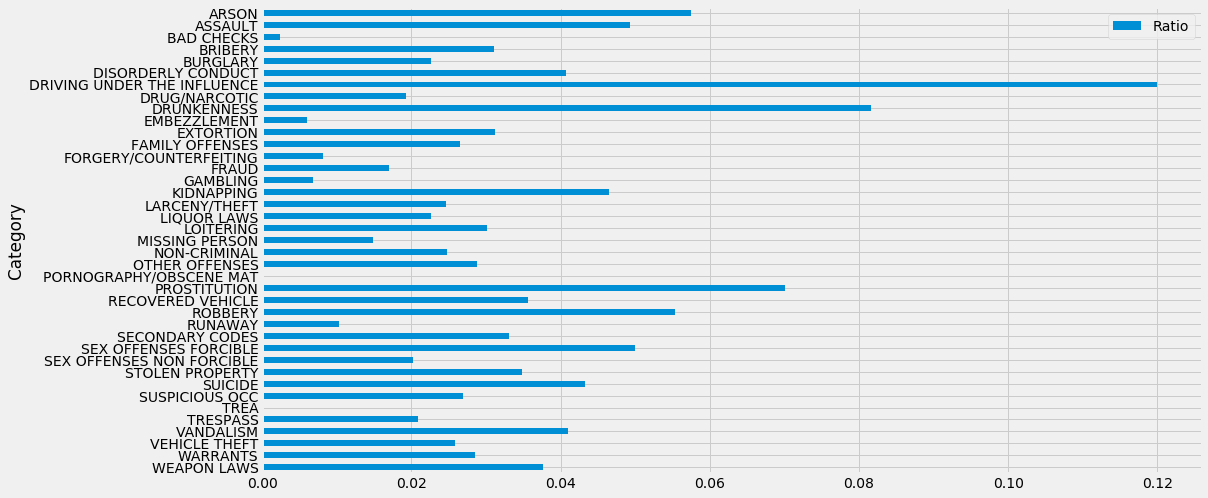

In [54]:
df['HOUR_RATIO'] = ((df.HOUR) == 12 | (df.HOUR == 18))
hrsplit = []                   
for cat in df.Category.unique():
    qwe = df[df.Category == cat]
    hrsplit +=[[(qwe.HOUR_RATIO.sum() / qwe.HOUR_RATIO.count()), cat]]
    
hrsplit = pd.DataFrame(hrsplit)
hrsplit.columns = ['Ratio', 'Category']
hrsplit.index = hrsplit.Category
hrsplit = hrsplit.sort_index(ascending = False)
hrsplit.plot.barh(figsize=(15,8))


### Location Analysis

In [ ]:
# Crimes of a particular type and District
test1 = df[(df.PdDistrict == 'SOUTHERN') & (df.Category == 'ARSON')]
fig = plt.figure(figsize=(15,10))
plt.scatter(test1.X , test1.Y)
mplleaflet.display(fig)

In [ ]:
# Crimes of a particular type and year
test2 = df[(df.PdDistrict == 'RICHMOND') & (df.Category == 'VEHICLE THEFT') & (df.YEAR == 2004)]
fig = plt.figure(figsize=(15,10))
plt.scatter(test2.X , test2.Y)
mplleaflet.display(fig)

In [ ]:
# Crimes with particular address
test3 = df[(df.Address.str.contains('MARKET')) & (df.Category == 'VEHICLE THEFT')]
fig = plt.figure(figsize=(15,10))
plt.scatter(test3.X , test3.Y)
mplleaflet.display(fig)

In [ ]:
# CODE FOR CONVERTING TEST RESULTS TO CSV

# df_results = pd.get_dummies(results)
# df_results.to_csv('submission1_1_vhe.csv')